In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

from hmmlearn import hmm
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

np.random.seed(42)

In [2]:
# train and test a model using a generated dataset
# the dataset follows a normal distribution
# see further on dataset part
model = hmm.GaussianHMM(n_components = 2, covariance_type = "full")

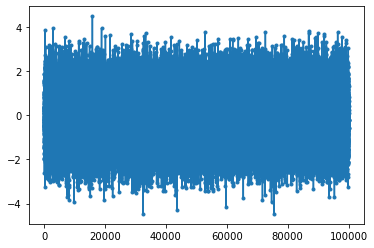

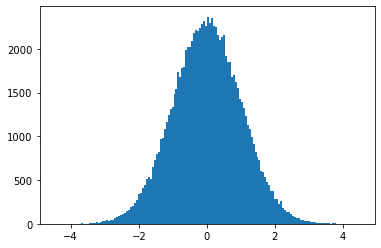

In [3]:
# the training set contains n_samples = 100 observation sequences
# each sequence follows a normal distribution N(mean = 0, s = 1)
# each sequence contains T = 1000 observations
n_samples = 100
T = 1000
mean_normal = 0
s_normal = 1
data_train = np.random.normal(loc = mean_normal, scale = s_normal, size = T)
data_train_len = [T]
for i in range(n_samples - 1):
    data_temp = np.random.normal(loc = mean_normal, scale = s_normal, size = T)
    data_train = np.concatenate([data_train, data_temp])
    data_train_len = np.concatenate((data_train_len, [T]))
plt.plot(data_train, ".-")
plt.show()
_ = plt.hist(data_train, bins = 'auto')
plt.show()

In [4]:
model.fit(data_train.reshape(-1, 1), data_train_len)

GaussianHMM(covariance_type='full', n_components=2)

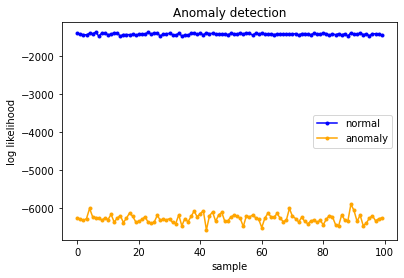

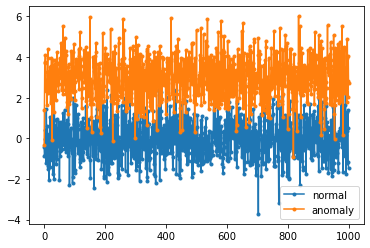

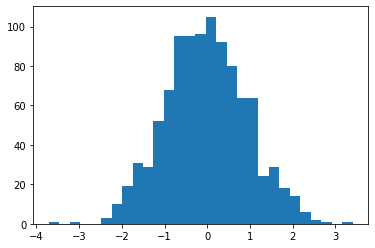

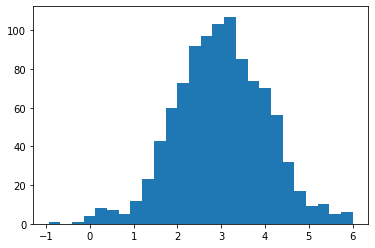

In [5]:
# Anomaly detection - simple case
# Plot the log likelihood of tests
# normal test set follows N(mean_normal, s_normal)
n_normal = 100
test_temp = np.random.normal(loc = mean_normal, scale = s_normal, size = T)
score_normal = [model.score(test_temp.reshape(-1, 1))]
for i in range(n_normal - 1):
    test_temp = np.random.normal(loc = mean_normal, scale = s_normal, size = T)
    score_normal = np.concatenate([score_normal, [model.score(test_temp.reshape(-1, 1))]])
plt.plot(score_normal[:], ".-", label="normal", color = 'blue')

# anomaly test set follows N(mean_anomaly, s_anomaly)
mean_anomaly = 3
s_anomaly = 1
n_anomaly = 100
test_temp = np.random.normal(loc = mean_anomaly, scale = s_anomaly, size = T)
score_anomaly = [model.score(test_temp.reshape(-1, 1))]
for i in range(n_normal - 1):
    test_temp = np.random.normal(loc = mean_anomaly, scale = s_anomaly, size = T)
    score_anomaly = np.concatenate([score_anomaly, [model.score(test_temp.reshape(-1, 1))]])
plt.plot(score_anomaly[:], ".-", label="anomaly", color = 'orange')
plt.xlabel("sample")
plt.ylabel("log likelihood")
plt.title("Anomaly detection")
plt.legend()
plt.show()

# draw some demo bar charts
demo1 = np.random.normal(loc = mean_normal, scale = s_normal, size = T)
demo2 = np.random.normal(loc = mean_anomaly, scale = s_anomaly, size = T)
plt.plot(demo1, ".-", label = "normal")
plt.plot(demo2, ".-", label = "anomaly")
plt.legend()
plt.show()

demo1_hist = plt.hist(demo1, bins = 'auto')
plt.show()
demo2_hist = plt.hist(demo2, bins = 'auto')
plt.show()

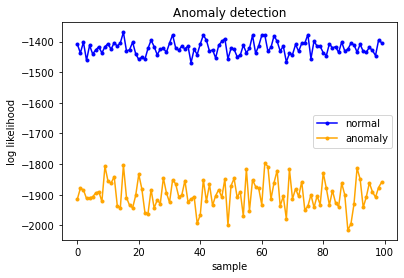

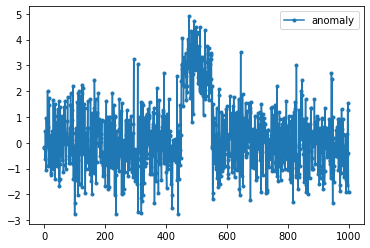

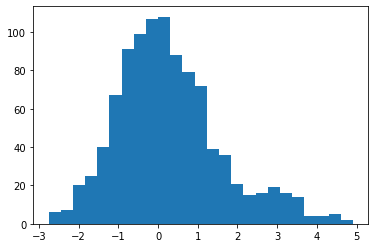

In [6]:
# Anomaly detection - simple case
# Plot the log likelihood of tests
# normal test set follows N(mean_normal, s_normal)
n_normal = 100
test_temp = np.random.normal(loc = mean_normal, scale = s_normal, size = T)
score_normal = [model.score(test_temp.reshape(-1, 1))]
for i in range(n_normal - 1):
    test_temp = np.random.normal(loc = mean_normal, scale = s_normal, size = T)
    score_normal = np.concatenate([score_normal, [model.score(test_temp.reshape(-1, 1))]])
plt.plot(score_normal[:], ".-", label="normal", color = 'blue')

# anomaly test set follows N(mean_anomaly, s_anomaly)
mean_anomaly = 3
s_anomaly = 1
n_anomaly = 100
anomaly_portion = 0.1
normal_half_portion = 0.45 # try to keep this portion * T an integer
test_temp1 = np.random.normal(loc = mean_normal, scale = s_normal, size = int(normal_half_portion * T))
test_temp2 = np.random.normal(loc = mean_anomaly, scale = s_anomaly, size = int(anomaly_portion * T))
test_temp3 = np.random.normal(loc = mean_normal, scale = s_normal, size = int(normal_half_portion * T))
test_temp = np.concatenate((test_temp1, test_temp2, test_temp3))
score_anomaly = [model.score(test_temp.reshape(-1, 1))]
for i in range(n_normal - 1):
    test_temp1 = np.random.normal(loc = mean_normal, scale = s_normal, size = int(normal_half_portion * T))
    test_temp2 = np.random.normal(loc = mean_anomaly, scale = s_anomaly, size = int(anomaly_portion * T))
    test_temp3 = np.random.normal(loc = mean_normal, scale = s_normal, size = int(normal_half_portion * T))
    test_temp = np.concatenate((test_temp1, test_temp2, test_temp3))
    score_anomaly = np.concatenate([score_anomaly, [model.score(test_temp.reshape(-1, 1))]])
plt.plot(score_anomaly[:], ".-", label="anomaly", color = 'orange')
plt.xlabel("sample")
plt.ylabel("log likelihood")
plt.title("Anomaly detection")
plt.legend()
plt.show()

# draw some demo bar charts
demo_temp1 = np.random.normal(loc = mean_normal, scale = s_normal, size = int(normal_half_portion * T))
demo_temp2 = np.random.normal(loc = mean_anomaly, scale = s_anomaly, size = int(anomaly_portion * T))
demo_temp3 = np.random.normal(loc = mean_normal, scale = s_normal, size = int(normal_half_portion * T))
demo = np.concatenate((test_temp1, test_temp2, test_temp3))

plt.plot(demo, ".-", label = "anomaly")
plt.legend()
plt.show()

demo_hist = plt.hist(demo, bins = 'auto')
plt.show()

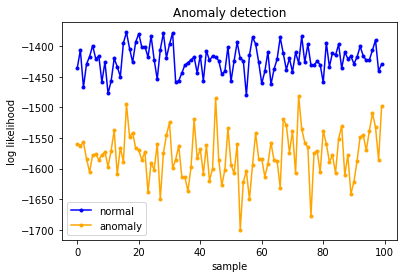

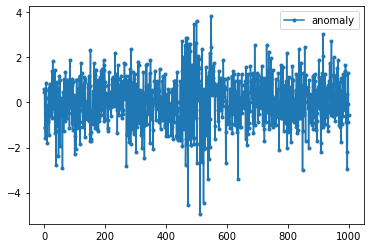

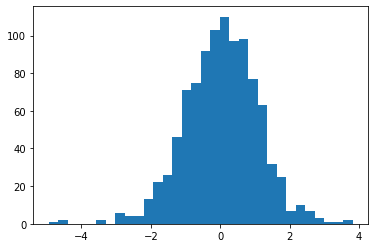

In [7]:
# Anomaly detection - simple case
# Plot the log likelihood of tests
# normal test set follows N(mean_normal, s_normal)
n_normal = 100
test_temp = np.random.normal(loc = mean_normal, scale = s_normal, size = T)
score_normal = [model.score(test_temp.reshape(-1, 1))]
for i in range(n_normal - 1):
    test_temp = np.random.normal(loc = mean_normal, scale = s_normal, size = T)
    score_normal = np.concatenate([score_normal, [model.score(test_temp.reshape(-1, 1))]])
plt.plot(score_normal[:], ".-", label="normal", color = 'blue')

# anomaly test set follows N(mean_anomaly, s_anomaly)
mean_anomaly = mean_normal
s_anomaly = 2
n_anomaly = 100
anomaly_portion = 0.1
normal_half_portion = 0.45 # try to keep this portion * T an integer
test_temp1 = np.random.normal(loc = mean_normal, scale = s_normal, size = int(normal_half_portion * T))
test_temp2 = np.random.normal(loc = mean_anomaly, scale = s_anomaly, size = int(anomaly_portion * T))
test_temp3 = np.random.normal(loc = mean_normal, scale = s_normal, size = int(normal_half_portion * T))
test_temp = np.concatenate((test_temp1, test_temp2, test_temp3))
score_anomaly = [model.score(test_temp.reshape(-1, 1))]
for i in range(n_normal - 1):
    test_temp1 = np.random.normal(loc = mean_normal, scale = s_normal, size = int(normal_half_portion * T))
    test_temp2 = np.random.normal(loc = mean_anomaly, scale = s_anomaly, size = int(anomaly_portion * T))
    test_temp3 = np.random.normal(loc = mean_normal, scale = s_normal, size = int(normal_half_portion * T))
    test_temp = np.concatenate((test_temp1, test_temp2, test_temp3))
    score_anomaly = np.concatenate([score_anomaly, [model.score(test_temp.reshape(-1, 1))]])
plt.plot(score_anomaly[:], ".-", label="anomaly", color = 'orange')
plt.xlabel("sample")
plt.ylabel("log likelihood")
plt.title("Anomaly detection")
plt.legend()
plt.show()

# draw some demo bar charts
demo_temp1 = np.random.normal(loc = mean_normal, scale = s_normal, size = int(normal_half_portion * T))
demo_temp2 = np.random.normal(loc = mean_anomaly, scale = s_anomaly, size = int(anomaly_portion * T))
demo_temp3 = np.random.normal(loc = mean_normal, scale = s_normal, size = int(normal_half_portion * T))
demo = np.concatenate((test_temp1, test_temp2, test_temp3))

plt.plot(demo, ".-", label = "anomaly")
plt.legend()
plt.show()

demo_hist = plt.hist(demo, bins = 'auto')
plt.show()

In [8]:
print(model.means_)
print("------")
print(model.covars_)
print("------")
print(model.transmat_)
print("------")
print(model.startprob_)

[[-0.50904756]
 [ 0.50694201]]
------
[[[0.74323103]]

 [[0.74426147]]]
------
[[0.4986325 0.5013675]
 [0.4975633 0.5024367]]
------
[0.4144629 0.5855371]
